# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Boston Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features['B']
logdis = np.log(boston_features['DIS'])
loglstat = np.log(boston_features['LSTAT'])

# Min-Max scaling
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# Standardization
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns = ['target'])

In [4]:
X

,CHAS,RM,DIS,B,LSTAT
0,0.0,6.575,0.542096,1.000000,-1.275260
1,0.0,6.421,0.623954,1.000000,-0.263711
2,0.0,7.185,0.623954,0.989737,-1.627858
3,0.0,6.998,0.707895,0.994276,-2.153192
4,0.0,7.147,0.707895,1.000000,-1.162114
...,...,...,...,...,...
501,0.0,6.593,0.331081,0.987619,-0.169811
502,0.0,6.120,0.297277,1.000000,-0.274682
503,0.0,6.976,0.274575,1.000000,-1.067939
504,0.0,6.794,0.315551,0.991301,-0.836660


In [5]:
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Perform a train-test split

In [23]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

### Apply your model to the train set

In [24]:
# Importing and initialize the linear regression model class
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
models = sm.OLS(y_train, X_train_const, hasconst=True)
results = models.fit()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
# Fit the model to train data
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     252.9
Date:                Wed, 01 Jul 2020   Prob (F-statistic):          4.21e-128
Time:                        18:50:21   Log-Likelihood:                -1346.9
No. Observations:                 455   AIC:                             2706.
Df Residuals:                     449   BIC:                             2731.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7380      3.143      0.235      0.814      -5.438       6.914
CHAS           2.9769      0.870      3.422      0.001       1.267       4.686
RM             3.2297      0.449      7.200      0.000       2.348       4.111
DIS           -6.2874      1.176     -5.345      0.000      -8.599      -3.976
B              4.3716      1.015      4.308      0.000       2.377       6.366
LSTAT         -6.2603      0.354    -17.673      0.000      -6.956      -5.564
==============================================================================
Omnibus:                       84.973   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.759
Skew:                           0.821   Prob(JB):                     2.68e-64
Kurtosis:                       6.570   Cond. No.                         94.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate predictions on training and test sets

In [26]:
# Calculate predictions on training and test sets
pre_train = results.predict(X_train_const)
pre_test = results.predict(sm.add_constant(X_test))

### Calculate training and test residuals

In [27]:
# Calculate residuals
res_train = y_train - pre_train
res_test = y_test - pre_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [28]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [29]:
# Calculate training and test MSE
mse_train = mean_squared_error(y_train, pre_train)
mse_test = mean_squared_error(y_test, pre_test)
print(mse_train, mse_test)

21.81845576726126 21.194281534482766


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

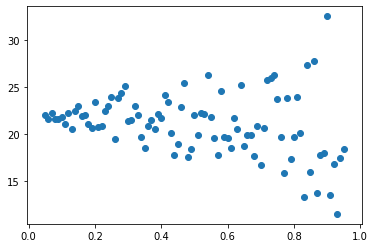

In [49]:
mse_train = []
mse_test = []
for i in [round(i*0.01, 2) for i in list(range(95, 4, -1))]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
    linreg.fit(X_train, y_train)
    y_pre_train = linreg.predict(X_train)
    y_pre_test = linreg.predict(X_test)
    y_mse_train = mean_squared_error(y_train, y_pre_train)
    y_mse_test = mean_squared_error(y_test, y_pre_test)
    mse_train.append(y_mse_train)
    mse_test.append(y_mse_test)

plt.scatter([round(i*0.01, 2) for i in list(range(95, 4, -1))], mse_train)
plt.scatter([round(i*0.01, 2) for i in list(range(95, 4, -1))], mse_train)

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

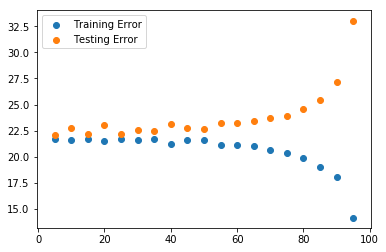

What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.